<a href="https://colab.research.google.com/github/HenryJi529/ColabNotebooks/blob/main/LecturePytorch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'1.13.1+cu116'

## Check GPU

In [ ]:
!nvidia-smi

Thu Mar 16 12:20:28 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    12W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Data(Preparing and loading)

In [ ]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1).cuda()
y = weight * X + bias

### Split Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.40, random_state=1)
X_validate, X_test, y_validate, y_test = train_test_split(X_, y_, test_size=0.50, random_state=1)

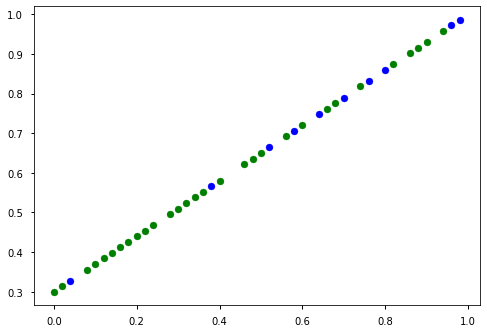

In [ ]:
with plt.style.context('seaborn-notebook'):
  plt.scatter(X_train.cpu().numpy(), y_train.cpu().numpy(), c="g")
  plt.scatter(X_test.cpu().numpy(), y_test.cpu().numpy(), c="b")

## Build model

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float, device='cuda'))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float, device='cuda'))
  def forward(self, x:torch.Tensor) -> torch.Tensor :
    return self.weights * x + self.bias


### Check Model

In [ ]:
torch.manual_seed(42)
model0 = LinearRegressionModel()
model0

LinearRegressionModel()

In [ ]:
list(model0.parameters())

[Parameter containing:
 tensor([0.1940], device='cuda:0', requires_grad=True), Parameter containing:
 tensor([0.1391], device='cuda:0', requires_grad=True)]

In [ ]:
model0.state_dict()

OrderedDict([('weights', tensor([0.1940], device='cuda:0')),
             ('bias', tensor([0.1391], device='cuda:0'))])

## Train Model

In [ ]:
list(model0.parameters())

[Parameter containing:
 tensor([0.1940], device='cuda:0', requires_grad=True), Parameter containing:
 tensor([0.1391], device='cuda:0', requires_grad=True)]

In [ ]:
model0.state_dict()

OrderedDict([('weights', tensor([0.1940], device='cuda:0')),
             ('bias', tensor([0.1391], device='cuda:0'))])

### Building a training loop

In [ ]:
Loss = nn.L1Loss()
optimizer = torch.optim.SGD(params=model0.parameters(), lr=0.01)

epochs = 200
epoch_count = []
train_loss_values = []
validate_loss_values = []

for epoch in range(epochs):
  # set model to training mode
  model0.train()

  # forward
  y_pred = model0(X_train)
  # calculate loss
  loss = Loss(y_pred, y_train)
  # optimizer zero grad
  optimizer.zero_grad()
  # backward
  loss.backward()
  # step
  optimizer.step()

  model0.eval() # 关闭只有训练模式才需要的一些配置
  with torch.inference_mode(): # 关闭梯度追踪
    y_validate_pred = model0(X_validate)
    validate_loss = Loss(y_validate_pred, y_validate)
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.cpu().numpy())
      validate_loss_values.append(validate_loss.cpu().numpy())
      print(f"Epoch: {epoch} | Train Loss: {loss:.6f} | Validate Loss: {validate_loss:.6f}")
      print(model0.state_dict())
      print()

Epoch: 0 | Train Loss: 0.372363 | Validate Loss: 0.431871
OrderedDict([('weights', tensor([0.1982], device='cuda:0')), ('bias', tensor([0.1491], device='cuda:0'))])

Epoch: 10 | Train Loss: 0.254890 | Validate Loss: 0.308463
OrderedDict([('weights', tensor([0.2400], device='cuda:0')), ('bias', tensor([0.2491], device='cuda:0'))])

Epoch: 20 | Train Loss: 0.145646 | Validate Loss: 0.194723
OrderedDict([('weights', tensor([0.2817], device='cuda:0')), ('bias', tensor([0.3431], device='cuda:0'))])

Epoch: 30 | Train Loss: 0.099119 | Validate Loss: 0.133365
OrderedDict([('weights', tensor([0.3187], device='cuda:0')), ('bias', tensor([0.3945], device='cuda:0'))])

Epoch: 40 | Train Loss: 0.084730 | Validate Loss: 0.105480
OrderedDict([('weights', tensor([0.3489], device='cuda:0')), ('bias', tensor([0.4145], device='cuda:0'))])

Epoch: 50 | Train Loss: 0.078256 | Validate Loss: 0.091626
OrderedDict([('weights', tensor([0.3736], device='cuda:0')), ('bias', tensor([0.4171], device='cuda:0'))])


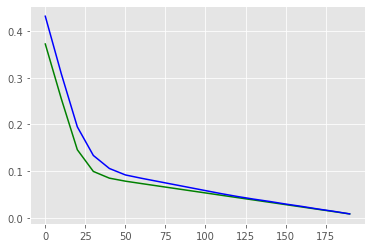

In [ ]:
with plt.style.context('ggplot'):
  plt.plot(epoch_count, train_loss_values, c='g')
  plt.plot(epoch_count, validate_loss_values, c='b')

In [ ]:
with torch.inference_mode(): # 关闭梯度追踪
  y_pred = model0(X_test)
  print(loss)

tensor(0.0036, device='cuda:0', grad_fn=<MeanBackward0>)


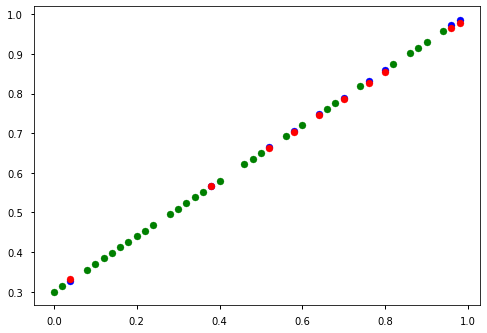

In [ ]:
with plt.style.context('seaborn-notebook'):
  plt.scatter(X_train.cpu().numpy(), y_train.cpu().numpy(), c="g")
  plt.scatter(X_test.cpu().numpy(), y_test.cpu().numpy(), c="b")
  plt.scatter(X_test.cpu().numpy(), y_pred.cpu().numpy(), c="r")

In [ ]:
import torch

# 创建一个简单的线性模型 y = wx + b
w = torch.tensor([2.0], requires_grad=True)
b = torch.tensor([1.0], requires_grad=True)

# 定义输入和目标
x = torch.tensor([1.0])
y = torch.tensor([5.0])

# 定义优化器和损失函数
optimizer = torch.optim.SGD([w, b], lr=0.01)
loss_fn = torch.nn.MSELoss()

# 前向传播
y_pred = w * x + b

# 计算损失
loss = loss_fn(y_pred, y)
print(y_pred)
# 计算梯度 
loss.backward()

# 查看梯度
print(w.grad)  # tensor([8.])
print(b.grad)  # tensor([2.])

# 更新参数
optimizer.step()

# 清空梯度
optimizer.zero_grad()


tensor([3.], grad_fn=<AddBackward0>)
tensor([-4.])
tensor([-4.])


## Save and Load Model

- `touch.save`
- `torch.load`
- `torch.nn.Module.load_state_dict`

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = 'model0.pth'
MODEL_SAVE_PATH =  MODEL_PATH / MODEL_NAME

torch.save(obj=model0.state_dict(), f=MODEL_SAVE_PATH)
print(f"save model to {MODEL_SAVE_PATH}")

save model to models/model0.pth


In [ ]:
model0.state_dict()

OrderedDict([('weights', tensor([0.6873], device='cuda:0')),
             ('bias', tensor([0.3051], device='cuda:0'))])

```python
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)
%cd gdrive/MyDrive
%ls
```

In [ ]:
model0.state_dict()

OrderedDict([('weights', tensor([0.6873], device='cuda:0')),
             ('bias', tensor([0.3051], device='cuda:0'))])

In [ ]:
model1 = LinearRegressionModel()
model1.state_dict()

OrderedDict([('weights', tensor([-0.5187], device='cuda:0')),
             ('bias', tensor([-0.6974], device='cuda:0'))])

In [ ]:
state_dict = torch.load(f=MODEL_SAVE_PATH)

In [ ]:
model1.load_state_dict(state_dict)

<All keys matched successfully>

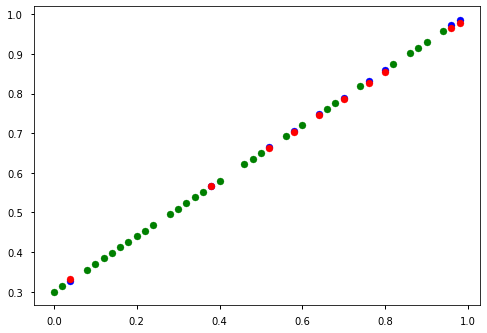

In [ ]:
with torch.inference_mode():
  y_pred = model1(X_test)
with plt.style.context('seaborn-notebook'):
  plt.scatter(X_train.cpu().numpy(), y_train.cpu().numpy(), c="g")
  plt.scatter(X_test.cpu().numpy(), y_test.cpu().numpy(), c="b")
  plt.scatter(X_test.cpu().numpy(), y_pred.cpu().numpy(), c="r")

## Practice

In [ ]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1, out_features=1, device="cuda")
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [ ]:
torch.manual_seed(42)
model2 = LinearRegressionModelV2()
model1, model2.state_dict()

(LinearRegressionModel(),
 OrderedDict([('linear_layer.weight', tensor([[0.2259]], device='cuda:0')),
              ('linear_layer.bias', tensor([0.9754], device='cuda:0'))]))

In [ ]:
torch.manual_seed(42)
Loss = nn.L1Loss()
optimizer = torch.optim.SGD(params=model2.parameters(), lr=0.01)

epochs = 200
epoch_count = []
train_loss_values = []
validate_loss_values = []

for epoch in range(epochs):
  # set model to training mode
  model2.train()

  # forward
  y_pred = model2(X_train)
  # calculate loss
  loss = Loss(y_pred, y_train)
  # optimizer zero grad
  optimizer.zero_grad()
  # backward
  loss.backward()
  # step
  optimizer.step()

  ## testing
  model2.eval() # 关闭只有训练模式才需要的一些配置
  with torch.inference_mode(): # 关闭梯度追踪
    y_validate_pred = model2(X_validate)
    validate_loss = Loss(y_validate_pred, y_validate)
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.cpu().numpy())
      validate_loss_values.append(validate_loss.cpu().numpy())
      print(f"Epoch: {epoch} | Train Loss: {loss:.6f} | Validate Loss: {validate_loss:.6f}")
      print(model2.state_dict())
      print()

Epoch: 0 | Train Loss: 0.477272 | Validate Loss: 0.397612
OrderedDict([('linear_layer.weight', tensor([[0.2217]], device='cuda:0')), ('linear_layer.bias', tensor([0.9654], device='cuda:0'))])

Epoch: 10 | Train Loss: 0.359799 | Validate Loss: 0.274204
OrderedDict([('linear_layer.weight', tensor([[0.1799]], device='cuda:0')), ('linear_layer.bias', tensor([0.8654], device='cuda:0'))])

Epoch: 20 | Train Loss: 0.251086 | Validate Loss: 0.166438
OrderedDict([('linear_layer.weight', tensor([[0.1424]], device='cuda:0')), ('linear_layer.bias', tensor([0.7701], device='cuda:0'))])

Epoch: 30 | Train Loss: 0.202769 | Validate Loss: 0.133140
OrderedDict([('linear_layer.weight', tensor([[0.1299]], device='cuda:0')), ('linear_layer.bias', tensor([0.7034], device='cuda:0'))])

Epoch: 40 | Train Loss: 0.174196 | Validate Loss: 0.123617
OrderedDict([('linear_layer.weight', tensor([[0.1277]], device='cuda:0')), ('linear_layer.bias', tensor([0.6514], device='cuda:0'))])

Epoch: 50 | Train Loss: 0.15678